In [1]:
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from mnist import MNIST

In [8]:
mndata = MNIST('../Data/')
images, labels = mndata.load_training()
images = np.array(images)[:784,:]

# Kernel PCA

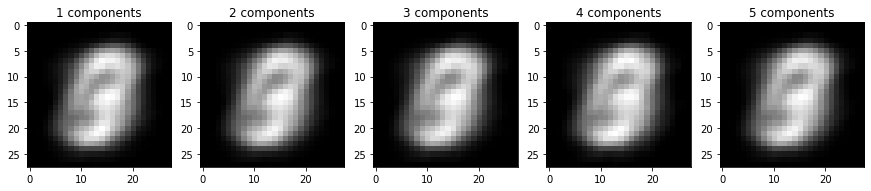

In [5]:
n_comps = [1,2,3,4,5]
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15,20))
for ax,i,n_comp in zip(axes.flatten(),range(len(n_comps)), n_comps):
    model = KernelPCA(kernel="rbf",n_components=n_comp,fit_inverse_transform=True,gamma=None, n_jobs=1)
    model.fit(images)
    X_tr = model.transform(images)
    X_inv = model.inverse_transform(X_tr)
    ax.imshow(X_inv[i].reshape((28, 28)),cmap='gray')
    ax.set_title("{} components".format(n_comp))

# LocallyLinearEmbedding

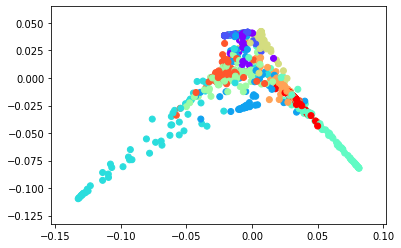

In [30]:
n_comps = 2
model = LocallyLinearEmbedding(n_components=n_comps,method = 'standard')
x = model.fit_transform(images)
plt.scatter(x[:, 0], x[:, 1],c=labels[:784], cmap=plt.cm.rainbow)

# ISO Map

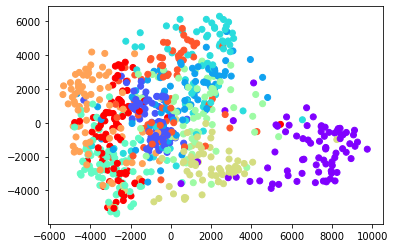

In [22]:
n_comps = [2]
model = Isomap(n_components=n_comp)
x = model.fit_transform(images)
plt.scatter(x[:, 0], x[:, 1],c=labels[:784], cmap=plt.cm.rainbow)

# TSNE

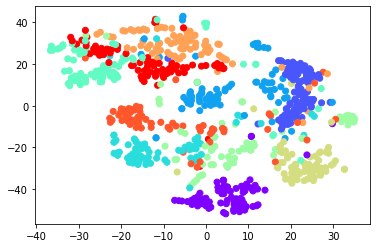

In [29]:
n_comps = 2
model = TSNE(n_components=n_comps)
x = model.fit_transform(images)
plt.scatter(x[:, 0], x[:, 1],c=labels[:784], cmap=plt.cm.rainbow)